In [1]:
import sys
print(sys.executable)


C:\Users\Mai\.venv\Scripts\python.exe


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel='ibm_cloud',
    token='hOsUDT7LPq7wsJERFoRfpv7vGklcqeP9d0zYpM2ruXJU',
    overwrite=True  
)



In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


In [4]:
# Initialize quantum circuit with one qubit and one classical bit
circ = QuantumCircuit(1, 1)
# Apply Hadamard gate to qubit at the index 0
circ.h(0)

# Measure the qubit at index 0 and store in the classical bit at index 0
circ.measure(0,0)

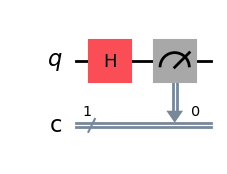

In [5]:
# Draw the quantum circuit using matplotlib
circ.draw("mpl")

In [6]:
print("Details of Classical Register: ", circ.cregs)
# Details of Classical Register:  [ClassicalRegister(1, 'c')]

print("Details of Quantum Register: ", circ.qregs)
# Details of Quantum Register:  [QuantumRegister(1, 'q')]

Details of Classical Register:  [ClassicalRegister(1, 'c')]
Details of Quantum Register:  [QuantumRegister(1, 'q')]


In [7]:
# Initializing the simulator
simulator = AerSimulator()

# Transpile 
circ = transpile(circ, simulator)

In [8]:
# Run the circuit on the simulator 10k times 
result = simulator.run(circ, shots = 10000).result()

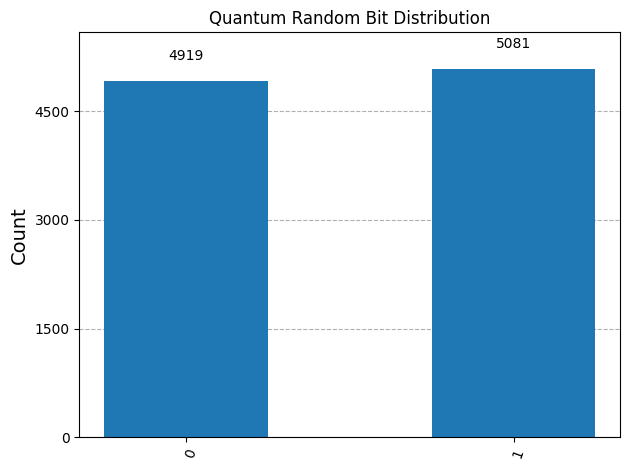

In [ ]:
# Get the data of the experiment
counts = result.get_counts(circ)

# Plot the data in a histogram
plot_histogram(counts, title='Quantum Random Bit Distribution')

In [10]:
# Run the simulator 20 times to generate 20-bit number
result = simulator.run(circ, shots=20, memory=True).result()

# Extract the results from memory in a list and print them
memory = result.get_memory(circ)
print(memory)

['1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0']


In [11]:
# Join the bits in the list
random_binary_string = ''.join(memory)  

# Convert the joined bits into an integer and print the result
random_integer = int(random_binary_string, 2)

print(random_integer)

877754
